# Eclipse Masking

This notebook demonstrates how to mask eclipses in TESS eclipsing binary (EB) light curves using `mono-cbp`.

To search for circumbinary planet transits in EB light curves, it's important to first mask the stellar eclipses; stellar eclipses are typically orders of magnitude larger in depth, making the much smaller planetary transits harder to find.

## Setup

In [1]:
from mono_cbp import EclipseMasker
from mono_cbp.utils import load_catalogue, setup_logging
%matplotlib inline

setup_logging(log_file=None)

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


<Logger mono_cbp (INFO)>

## Load catalogue

Let's use the TESS Eclipsing Binary Catalogue for the binary ephemerides and the eclipse parameters.

In [2]:
catalogue = load_catalogue('../catalogues/TEBC_morph_05_P_7.csv', TEBC=True)
catalogue.head()

2025-12-08 03:53:28 - mono_cbp.utils.data - INFO - Loaded catalogue with 592 targets from ../catalogues/TEBC_morph_05_P_7.csv


,tess_id,period,bjd0,sectors,prim_pos,prim_width,sec_pos,sec_width
0,363326796,11.395621,1553.843475,9,9.999675e-01,0.028907,0.500015,0.037838
1,146530594,27.087945,1561.765652,"9,10,36",5.305902e-05,0.022902,0.000000,0.000000
2,349518145,8.279875,1327.574927,"1,2,3,4,5,6,7,8,9,10,11,12,13",5.004339e-01,0.021721,0.000476,0.022329
3,398850090,13.181334,1579.023368,10,3.253973e-07,0.023537,0.534160,0.030881
4,300293197,13.117610,1592.589334,"1,2,3,4,5,6,7,8,9,10,11,12,13,28,29,30,31,32,3...",0.000000e+00,0.000000,0.000000,0.000000


## Initialise `EclipseMasker`

The `EclipseMasker` class allows us to generate Boolean masks for in-eclipse data (True for data that is in-eclipse, False otherwise) and visualise the results. These masks are then appended onto the input file as the final column (i.e., a True or False value assigned to each cadence denoting whether the data point is in-eclipse).

Note that if using the TESS Eclipsing Binary Catalogue (TEBC) format for eclipse parameters (e.g., prim_pos_2g, sec_width_pf, etc.), you must set `TEBC=True` if you use a filepath for `catalogue`.

In [3]:
# Alternatively, you can load the catalogue into EclipseMasker from the filepath
masker = EclipseMasker(
    catalogue=catalogue,
    data_dir='../data',
    TEBC=True
)

2025-12-08 03:53:33 - mono_cbp.eclipse_masking - INFO - Catalogue already has standard eclipse parameter columns, skipping TEBC processing
2025-12-08 03:53:33 - mono_cbp.eclipse_masking - INFO - Initialised EclipseMasker with data directory: ../data


## Create eclipse mask for all light curves in `data_dir`

We can apply our eclipse mask calculation to an entire directory of light curve files with `masker.mask_all()`. Setting `force=True` prompts `EclipseMasker` to re-calculate the eclipse mask with the catalogue parameters even if an eclipse mask column exists in the input data file.

In [ ]:
masker.mask_all(force=True)

## Create eclipse mask for specific light curve

We can also calculate the eclipse mask to an individual data file using `masker.mask_file()`.

In [4]:
fname = 'TIC_260128333_06.npz'
masker.mask_file(fname, force=True)

2025-12-08 03:53:50 - mono_cbp.eclipse_masking - INFO - Saved eclipse mask to TIC_260128333_06.npz


## Visualization: phase-folded light curve

Finally, if you want to assess whether the eclipses have been adequately removed from your data, you can visualise the in-eclipse and out-of-eclipse data using `masker.plot_bin_phase_fold()`.

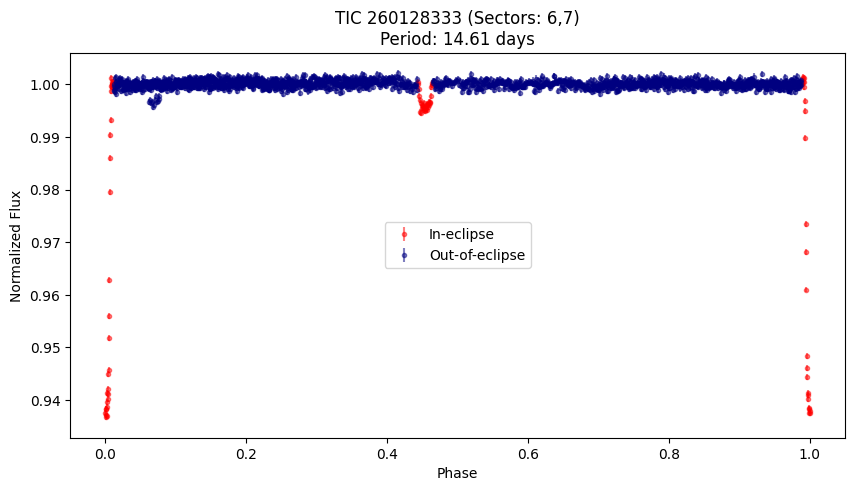

In [5]:
tic_id = 260128333
# You can set save_fig=True to save the figure, and specify save_path
masker.plot_bin_phase_fold(tic_id=tic_id, save_fig=False, save_path='.')

As you can see, the eclipse mask appears to be accurate for this target!

Now we are happy that the eclipse masks are accurate, the data is now ready to be passed to the TCE search component (see [03_transit_finding.ipynb](03_transit_finding.ipynb)).